# Analyse en composante pricipale

**l'objectif est de déterminer quelles sont les varibles clé du Dataset Agriculture CropYield Dataset.**


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from pathlib import Path
import seaborn as sns

In [3]:
# Racine du projet (parent de script/)
PROJECT_ROOT = Path.cwd().parent
INPUTS_DIR = PROJECT_ROOT / "inputs" / "raw"

In [4]:
crop_yield = pd.read_csv(INPUTS_DIR /"crop_yield.csv")
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


Nous n'avons que 4 variables numériques. Or comme on le sait, le PCA ne prend en compte que les variables numériques.


In [7]:
crop_yield.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

Il n'y a pas d'info manquante dans le DF.

In [8]:
crop_yield.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [11]:
y = crop_yield["Yield_tons_per_hectare"]

In [12]:
X = crop_yield.drop(columns=["Yield_tons_per_hectare"])
X.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110


In [13]:
# Séparation des types de variables pour l'encoding 

categorical_vars = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
binary_vars = ['Fertilizer_Used', 'Irrigation_Used']  # déjà booléennes
numeric_vars = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
target = 'Yield_tons_per_hectare'

In [14]:
# Encodage simple pour appliquer ensuite le PCA : 

df_encoded = crop_yield.copy()
    
# Encodage des variables catégorielles avec Label Encoding (évite explosion dimensionnelle)

for col in categorical_vars: 
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(crop_yield[col])

# Conversion booléennes en 0/1
for col in binary_vars:
    df_encoded[col] = df_encoded[col].astype(int)

In [15]:
df_encoded.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,3,4,1,897.077239,27.676966,0,1,0,122,6.555816
1,2,1,3,992.673282,18.026142,1,1,1,140,8.527341
2,1,2,0,147.998025,29.794042,0,0,2,106,1.127443
3,1,4,4,986.866331,16.644190,0,1,1,146,6.517573
4,2,5,5,730.379174,31.620687,1,1,0,110,7.248251


In [16]:
X = df_encoded.drop( columns = ["Yield_tons_per_hectare"])
X.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
0,3,4,1,897.077239,27.676966,0,1,0,122
1,2,1,3,992.673282,18.026142,1,1,1,140
2,1,2,0,147.998025,29.794042,0,0,2,106
3,1,4,4,986.866331,16.644190,0,1,1,146
4,2,5,5,730.379174,31.620687,1,1,0,110


In [17]:
# Standardisation des variables : 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
pca = PCA()
pca.fit(X_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

In [19]:
pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Variance": pca.explained_variance_ratio_,
    "Variace Cumulée": np.cumsum(pca.explained_variance_ratio_)
})

,PC,Variance,Variace Cumulée
0,PC1,0.111598,0.111598
1,PC2,0.111499,0.223097
2,PC3,0.111445,0.334542
3,PC4,0.111214,0.445756
4,PC5,0.111178,0.556934
5,PC6,0.110933,0.667867
6,PC7,0.110812,0.778679
7,PC8,0.110733,0.889412
8,PC9,0.110588,1.000000


Nous constatons que la variance est uniformément répartie sur l'ensemble des PC. Cela voudrait dire qu'il n'y a pas de dominance. Aucune composante ne se démarque par rapport aux autres. Notre PCA ne révèle rien de concluant.

Le problème pourrait fort probablement venir de l'encoding. Car le PCA n'est pas la méthode adaptée pour les variables mixtes.
L'application de l'encoding sur les variables catégorielles, rend les distances artificielles, et les corrélations n'ont plus de vraiment d'interpération statistique valide.


L’ACP devient purement algorithmique et conceptuellement invalide.
Nous constatons dans un premier temps que les différentes composantes ont la même variance. Cela laisse comprendre qu'il n'y a pas une composante plus importante que l'autre. Regardons maintenant la composition de chaque PC.

In [20]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)])
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Region,0.411516,-0.234205,-0.182746,0.023180,-0.314996,0.779300,0.001106,0.184985,-0.033443
Soil_Type,-0.063311,0.546091,0.274607,0.296732,0.146179,0.291139,0.611062,0.121291,0.200197
Crop,0.308885,0.055511,-0.168692,0.600336,0.526001,0.013256,-0.205896,-0.095282,-0.429329
Rainfall_mm,0.168398,-0.451743,0.481391,0.368802,0.103627,-0.112158,-0.169252,0.230877,0.542725
Temperature_Celsius,0.399131,0.313381,0.018622,0.162660,-0.514404,-0.443849,-0.022246,0.466730,-0.189039
Fertilizer_Used,0.441779,0.488771,0.129524,-0.194779,0.001011,0.072371,-0.419077,-0.446911,0.361421
Irrigation_Used,0.314807,0.025208,-0.077581,-0.542965,0.571255,-0.049396,0.078029,0.512094,0.048286
Weather_Condition,-0.245689,0.136416,0.654445,-0.143590,0.011763,0.265453,-0.394158,0.206308,-0.451203
Days_to_Harvest,-0.434669,0.288841,-0.423746,0.187534,0.030185,0.141528,-0.466898,0.407820,0.328104


En analysant les loadings de chaque PC, nous remarquons que chaque compositions est intéressante. Par exemple, PC3 est axée sur le poids de la pluviométrie, et du weather condition.
PC4 analyse le type de culture et la pluie. Mais aucune ne se démarque par rapport à l'autre.

In [21]:
importance = (loadings.abs().mul(pca.explained_variance_ratio_, axis=1).sum(axis=1).sort_values(ascending=False))

importance


Days_to_Harvest        0.301032
Rainfall_mm            0.292129
Fertilizer_Used        0.283932
Soil_Type              0.283390
Temperature_Celsius    0.281131
Weather_Condition      0.278708
Crop                   0.267021
Irrigation_Used        0.246656
Region                 0.240758
dtype: float64

Le classement de l'importance des variables montrent que aucune variable ne se démontre particulièrement par rapport aux autres variables.

Nous allons essayer de faire une PCA uniquement sur les variables numériques pour voir si on aurait un résultat plus concluant :

In [22]:
df_num = crop_yield.copy()
df_num.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [23]:
df_num = df_num.drop(columns=["Yield_tons_per_hectare", "Region",
                              "Soil_Type", "Crop","Fertilizer_Used",
                              "Irrigation_Used","Weather_Condition" ])

In [24]:
df_num.head()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest
0,897.077239,27.676966,122
1,992.673282,18.026142,140
2,147.998025,29.794042,106
3,986.866331,16.644190,146
4,730.379174,31.620687,110


In [25]:
scaler=StandardScaler()
num_scaled = scaler.fit_transform(df_num)

In [26]:
pca = PCA()
pca.fit(num_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

In [27]:
pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Variance": pca.explained_variance_ratio_,
    "Variace Cumulée": np.cumsum(pca.explained_variance_ratio_)
})


,PC,Variance,Variace Cumulée
0,PC1,0.334246,0.334246
1,PC2,0.333354,0.667600
2,PC3,0.332400,1.000000


In [28]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=df_num.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)])
loadings

,PC1,PC2,PC3
Rainfall_mm,-0.685469,-0.263087,0.678909
Temperature_Celsius,-0.158873,0.964013,0.213160
Days_to_Harvest,0.710557,-0.038254,0.702599


In [30]:
importance = (loadings.abs().mul(pca.explained_variance_ratio_, axis=1).sum(axis=1).sort_values(ascending=False))
importance


Rainfall_mm            0.542486
Days_to_Harvest        0.483797
Temperature_Celsius    0.445315
dtype: float64

L'analyse PCA sur les variables numériques uniquement donne les même résultats que l'analyse menée sur la totalité des variables, à savoir que toutes les variables ont sensiblement la même importance.

Nous allons faire une analyse de corrélation sur l'ensemble des variables après encoding pour analyse toutes les variables et mieux comprendre les résultats du PCA :

In [37]:
corr_crop_yield_enc= df_encoded.select_dtypes(include = "number").corr()
corr_crop_yield_enc

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
Region,1.000000,-0.001143,0.000494,0.000478,0.000784,0.000570,0.000217,-0.001450,-0.001169,0.000390
Soil_Type,-0.001143,1.000000,0.000869,-0.000678,0.000732,0.001364,-0.000564,0.001695,0.000602,-0.000333
Crop,0.000494,0.000869,1.000000,0.001214,0.000286,0.000871,0.000657,-0.001783,0.000329,0.001283
Rainfall_mm,0.000478,-0.000678,0.001214,1.000000,-0.000123,-0.001076,-0.000568,0.001360,-0.002669,0.764618
Temperature_Celsius,0.000784,0.000732,0.000286,-0.000123,1.000000,0.002343,-0.000484,-0.000833,-0.000731,0.085565
Fertilizer_Used,0.000570,0.001364,0.000871,-0.001076,0.002343,1.000000,0.001510,0.000643,-0.001029,0.442099
Irrigation_Used,0.000217,-0.000564,0.000657,-0.000568,-0.000484,0.001510,1.000000,-0.000556,-0.001234,0.353741
Weather_Condition,-0.001450,0.001695,-0.001783,0.001360,-0.000833,0.000643,-0.000556,1.000000,-0.000397,0.001132
Days_to_Harvest,-0.001169,0.000602,0.000329,-0.002669,-0.000731,-0.001029,-0.001234,-0.000397,1.000000,-0.002591
Yield_tons_per_hectare,0.000390,-0.000333,0.001283,0.764618,0.085565,0.442099,0.353741,0.001132,-0.002591,1.000000


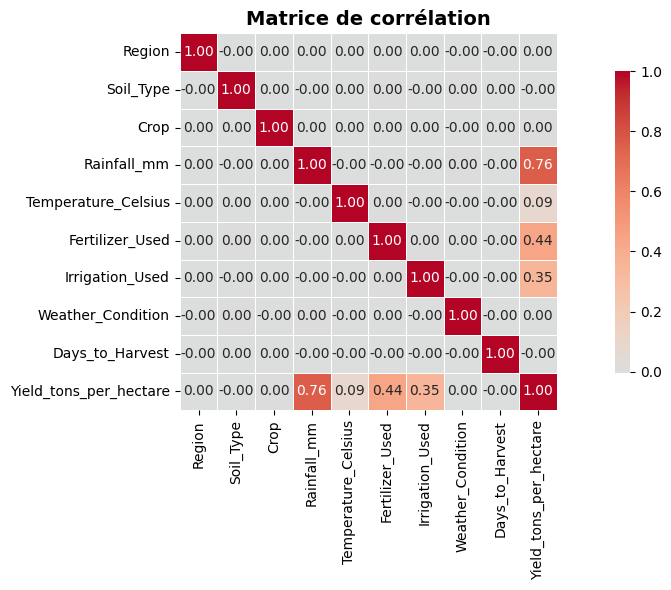

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_crop_yield_enc,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Matrice de corrélation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [42]:
for col in crop_yield.select_dtypes(include="object").columns:
    print(f"\nColonne : {col}")
    display(crop_yield[col].value_counts())


Colonne : Region


Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64


Colonne : Soil_Type


Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64


Colonne : Crop


Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64


Colonne : Weather_Condition


Weather_Condition
Sunny     333790
Rainy     333561
Cloudy    332649
Name: count, dtype: int64

In [45]:
crop_yield.groupby('Crop')['Days_to_Harvest'].count()

Crop
Barley     166777
Cotton     166585
Maize      166824
Rice       166792
Soybean    166349
Wheat      166673
Name: Days_to_Harvest, dtype: int64

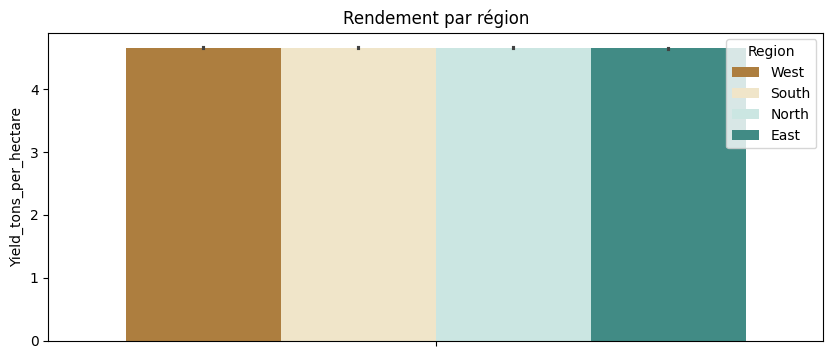

In [57]:
plt.figure(figsize=(10,4))
sns.barplot(data=crop_yield, hue = crop_yield.Region, y = crop_yield.Yield_tons_per_hectare,palette='BrBG', legend=True)
plt.title("Rendement par région")
plt.xticks(rotation=90)
plt.show()

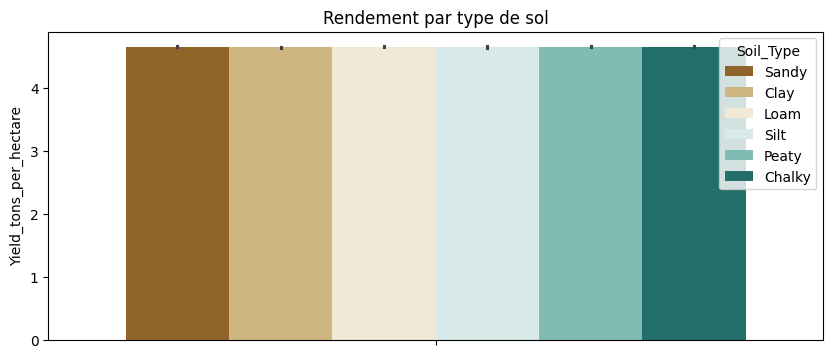

In [58]:
plt.figure(figsize=(10,4))
sns.barplot(data=crop_yield, hue = crop_yield.Soil_Type, y = crop_yield.Yield_tons_per_hectare,palette='BrBG', legend=True)
plt.title("Rendement par type de sol")
plt.xticks(rotation=90)
plt.show()

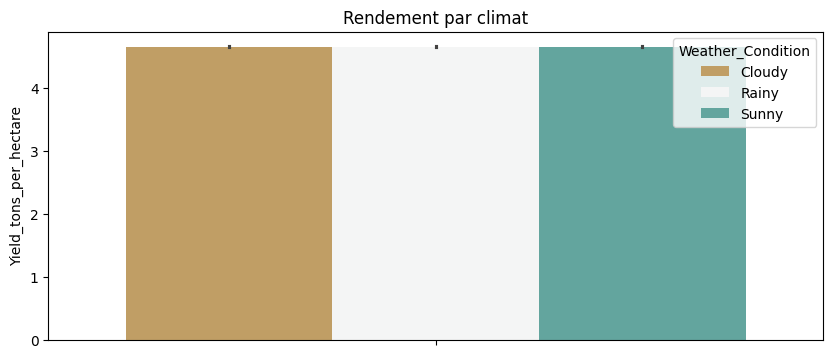

In [59]:
plt.figure(figsize=(10,4))
sns.barplot(data=crop_yield, hue = crop_yield.Weather_Condition, y = crop_yield.Yield_tons_per_hectare,palette='BrBG', legend=True)
plt.title("Rendement par climat")
plt.xticks(rotation=90)
plt.show()

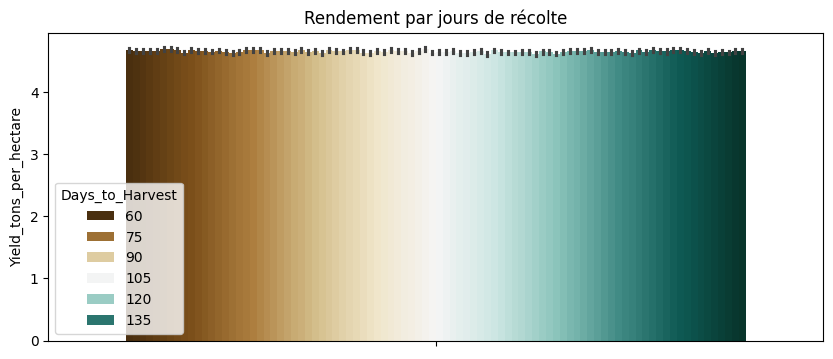

In [60]:
plt.figure(figsize=(10,4))
sns.barplot(data=crop_yield, hue = crop_yield.Days_to_Harvest, y = crop_yield.Yield_tons_per_hectare,palette='BrBG', legend=True)
plt.title("Rendement par jours de récolte")
plt.xticks(rotation=90)
plt.show()

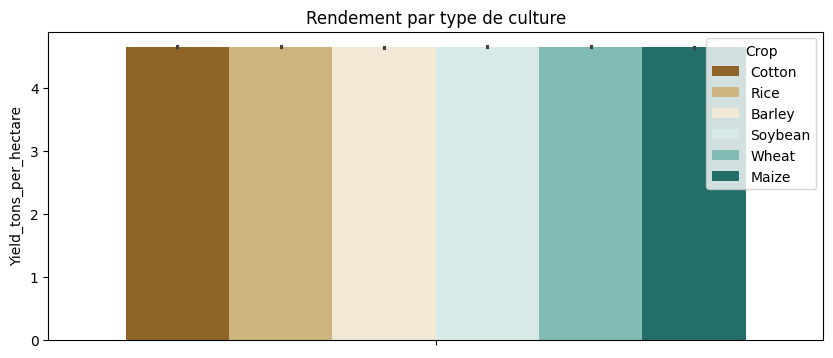

In [61]:
plt.figure(figsize=(10,4))
sns.barplot(data=crop_yield, hue = crop_yield.Crop, y = crop_yield.Yield_tons_per_hectare,palette='BrBG', legend=True)
plt.title("Rendement par type de culture")
plt.xticks(rotation=90)
plt.show()

Ces résultats rejoignent également les constats tirés de l'analyse exploratoire menée en parallèle sur ce dataset, où nous avons constaté que l'ensemble des colonnes catégorielles + la variable Days_to_harvest ont une distribution uniforme. Ceci n'a donc pas de valeur ajoutée à l'analyse, et on a été amené à supprimer ces variables.

Nous retenons donc que les variables utiles et constructives tirées de ce dataset pour la modélisation sont : 

**Rainfall_mm**

**Fertilizer_Used**

**Irrigation_Used**

**Temperature_Celsius**


**